The objective is to identify which customer will make a transaction in the future
Type of problem - classification



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn import metrics
from sklearn.tree import plot_tree
%matplotlib inline
random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_train = pd.read_csv('train(1).csv')#Read datasets
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [ ]:
#shape of the data set
df_train.shape

(200000, 202)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
#Event rate for the training data 
df_train.groupby('target').size()

target
0    179902
1     20098
dtype: int64

In [ ]:
#Percentage of target class count
per_target_class=df_train['target'].value_counts()/len(df_train)*100
print('Percentage of target class count :\n',per_target_class)

Percentage of target class count :
 0    89.951
1    10.049
Name: target, dtype: float64


In [ ]:
#Summary of the data set
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
#Count plot & violin plot for target class
#fig,ax=plt.subplots(1,2,figsize=(20,5))
#sns.countplot(df_train.target.values,ax=ax[0],palette='spring')
#sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette='spring')
#sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
#ax[0].set_xlabel('Target')
#ax[1].set_xlabel('Target')
#ax[1].set_ylabel('Index')

percentage of data belongs to 0: 89.951 %
percentage of data belongs to 1: 10.049 %


[]

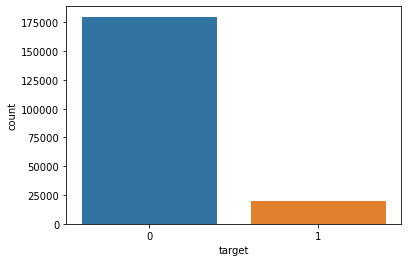

In [ ]:
#ax = sns.countplot('target', df = df_train)
#print('percentage of data belongs to 0 :', df_train['target'].value_counts ()[0]*100/200000,”%”)
#print('percentage of data belongs to 1 :', df_train['target'].value_counts ()[1]*100/200000,”%”)
#ax.plot()
ax = sns.countplot('target',data = df_train)
print("percentage of data belongs to 0:", df_train["target"].value_counts()[0]*100/200000,"%")
print("percentage of data belongs to 1:", df_train["target"].value_counts()[1]*100/200000,"%")
ax.plot()

As we can see that around 90% of dta belongs to 0 class and only 10 % belongs to class 1 hence we can conclude that the data is an imbalanced data

###checking for the null values

In [ ]:
df_train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

200 numeric values,the binary target column and string ID_code column.

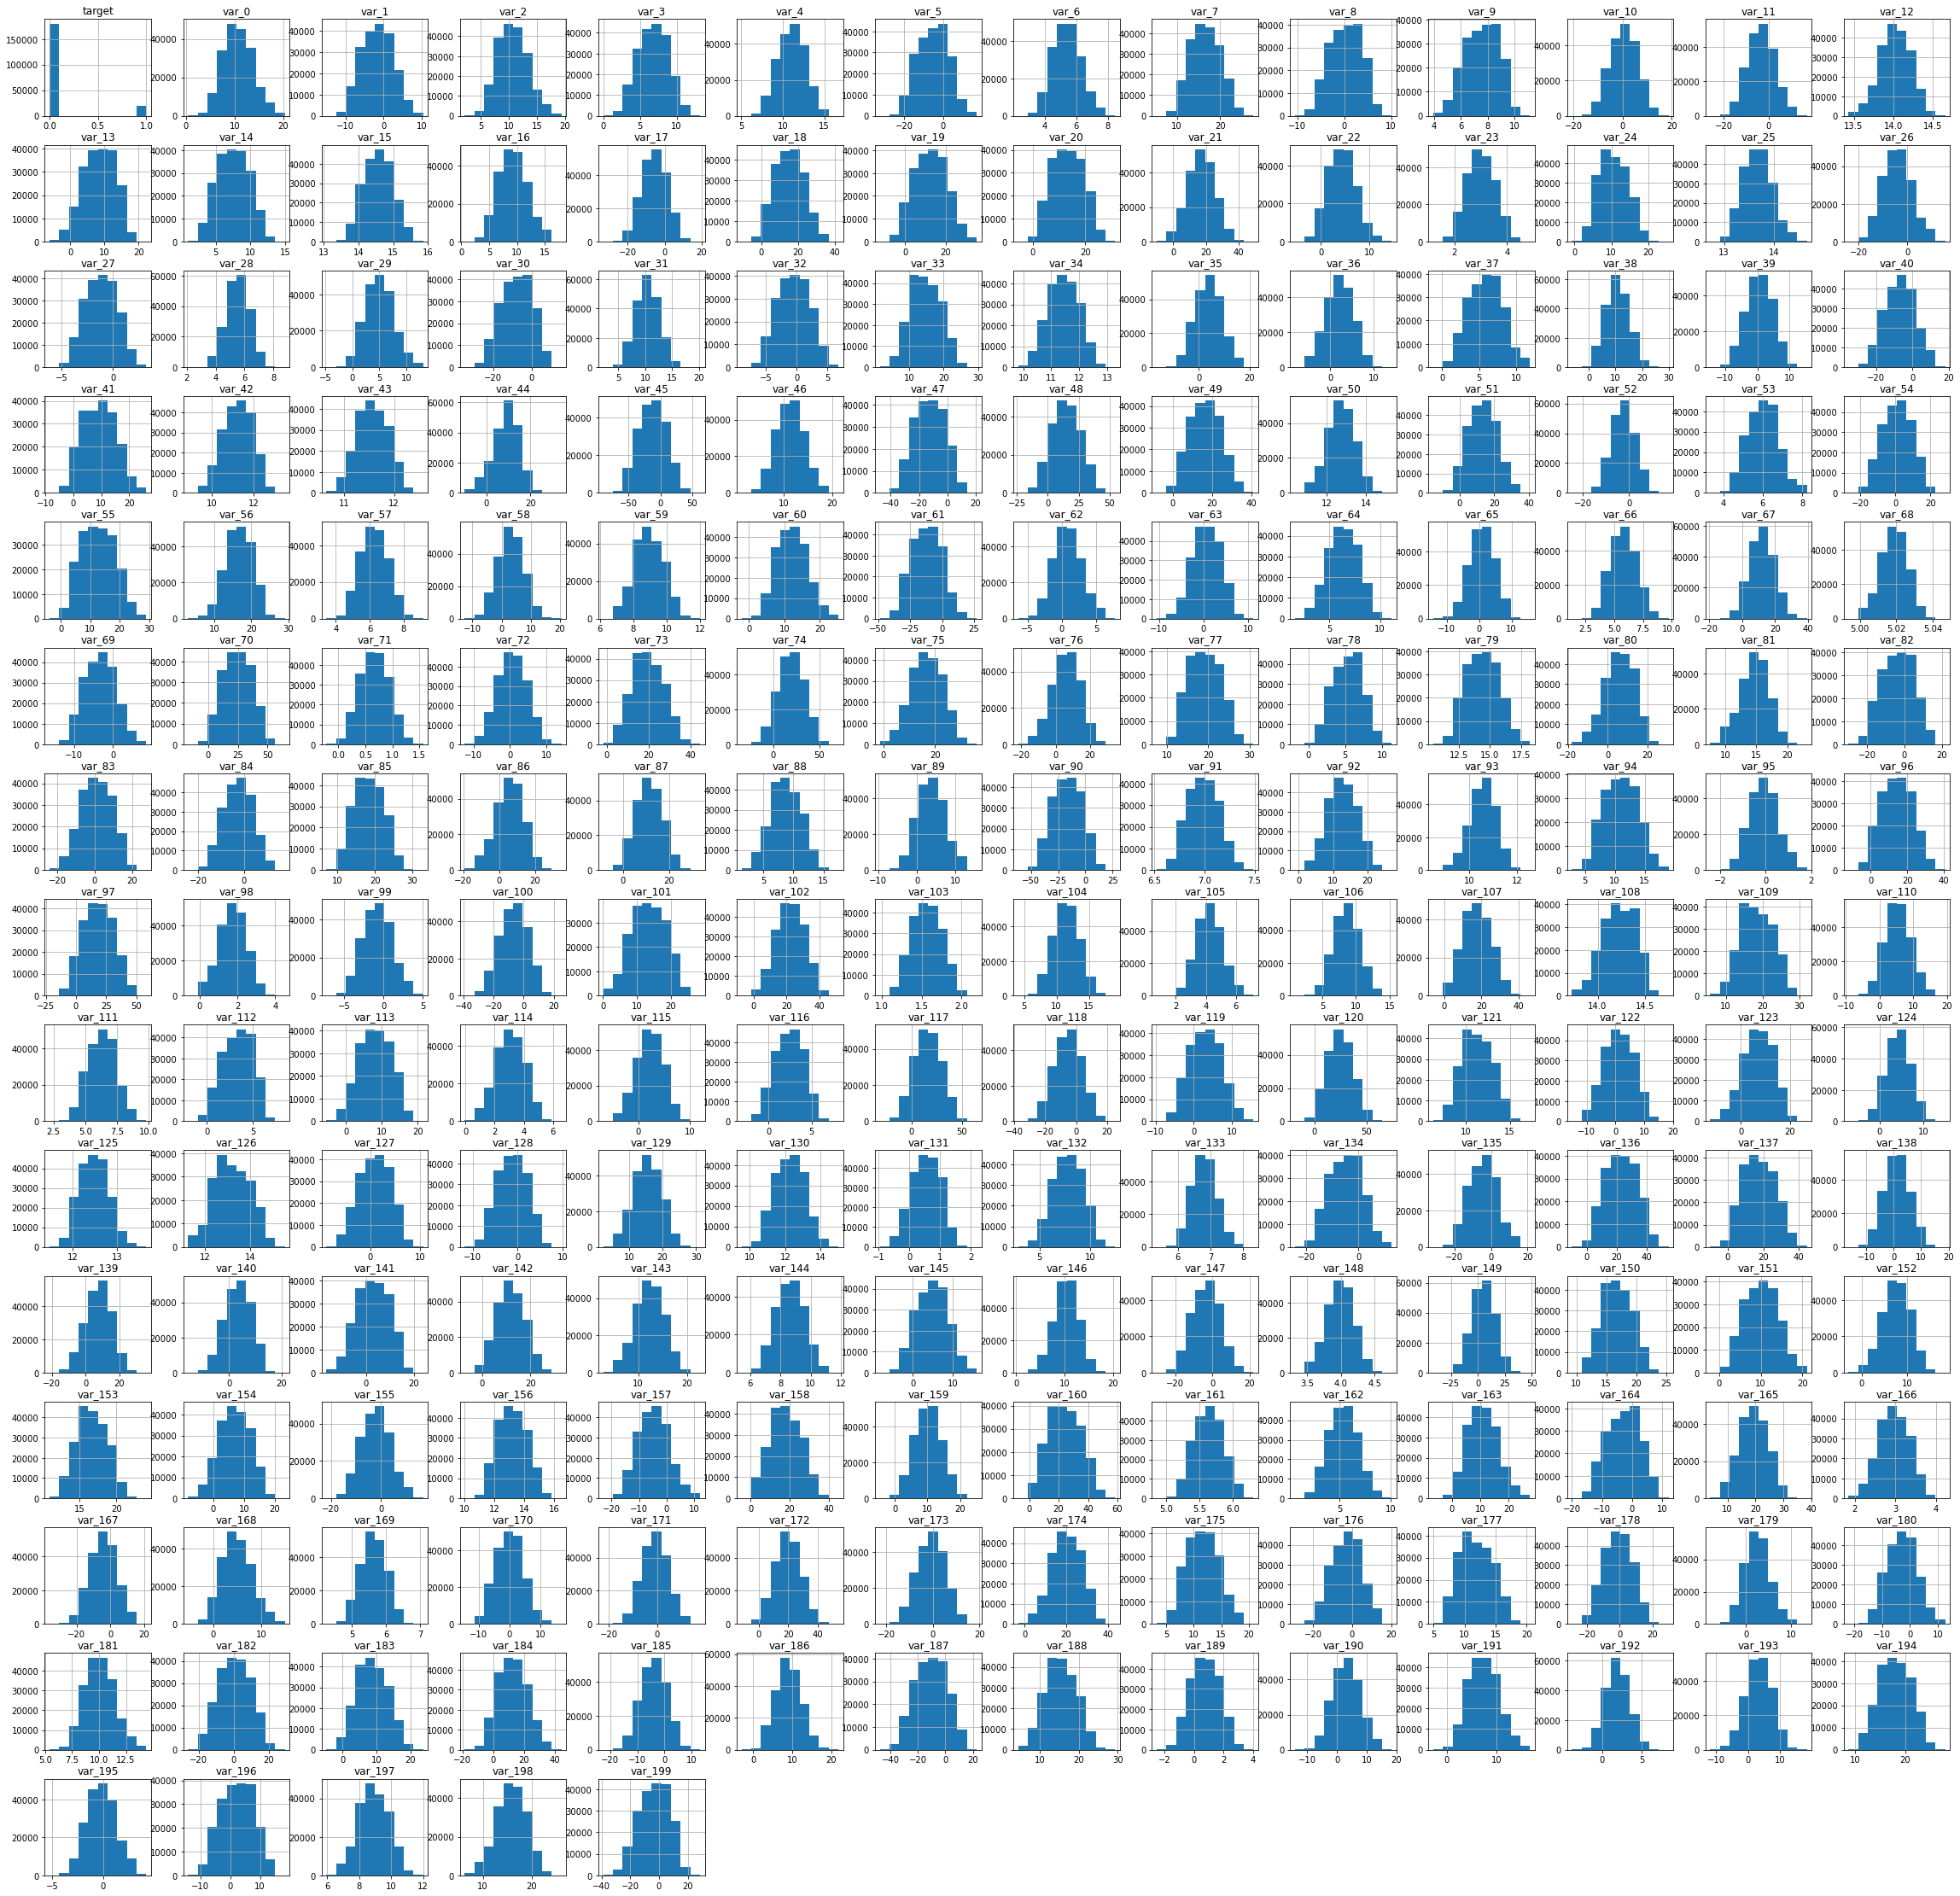

In [ ]:
# How's the data distributed?
df_train.hist(figsize=(40,40));

Almost all features follow normalised distribution

Trying some classical algorithm 

Logistic Regression - method for binary classification problems #(problems with two class values)

In [ ]:
#split X and Y
y = df_train['target']
X = df_train.drop(['target', "ID_code"], axis=1)


In [ ]:
#split into train and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
print(X_train.shape)
print(y_train.shape)


X_train.shape , X_test.shape , y_train.shape , y_test.shape

(160000, 200)
(160000,)


((160000, 200), (40000, 200), (160000,), (40000,))

In [ ]:
X_train[0:5]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
62732,9.2576,-4.8225,9.9333,11.5466,11.4010,8.3349,4.7472,15.1534,-0.0159,6.6678,...,1.3975,9.9300,0.4849,1.0523,17.1543,-0.8804,-1.0263,10.1848,12.2544,-2.7206
130248,10.2610,-0.5382,9.6663,7.9816,12.1939,-18.6753,6.8017,23.1419,3.9163,7.6175,...,0.7579,5.7119,-0.0892,7.9621,24.6020,-1.1087,7.4797,8.1924,14.7649,11.0305
182454,6.0660,2.6057,9.9309,9.9772,11.6799,-14.8042,4.8042,17.3966,1.9798,5.3264,...,13.4627,9.5735,2.5640,-0.2978,12.0940,-2.8350,0.9943,7.5378,19.1301,2.0724
158745,7.5870,4.6824,7.3533,7.9163,12.3500,-15.9468,5.2829,18.4133,-5.2262,8.6676,...,-3.0796,6.5452,1.3391,0.7834,17.2428,1.0942,-3.1594,8.2398,12.9023,-7.2649
176029,11.7077,1.0611,11.4628,3.4941,11.0481,4.7861,5.6637,16.7894,-5.1694,7.3037,...,0.5325,8.1590,1.5509,2.4417,13.0332,3.1672,12.1768,7.7631,14.1895,14.8836


Model initialiazation and evaluating the model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression #import


LogReg = LogisticRegression() #initialize
LogReg.fit(X_train, y_train)

print(LogReg.coef_)
print(LogReg.intercept_)

[[ 4.80005354e-02  4.10224533e-02  7.55707986e-02  2.12271202e-02
   2.17491488e-02  1.33945991e-02  3.29521056e-01  1.42016236e-03
   1.45834694e-02 -1.20588479e-01 -1.35479950e-03  1.29310848e-02
  -5.48760347e-02 -3.82369669e-02 -2.01207075e-03  1.35183939e-01
   1.24630215e-02 -9.65967393e-04  1.76071517e-02  6.28856285e-03
  -1.01002497e-02 -2.40997922e-02  7.31760043e-02 -1.05124258e-01
   2.83092211e-02  1.02290872e-01  3.43299653e-02 -2.05583854e-03
  -1.06176789e-01  1.51962291e-02 -6.97292334e-04 -3.43837390e-02
   4.58957912e-02 -3.37631408e-02 -1.95653959e-01  2.34706516e-02
  -3.41265044e-02  1.50549471e-02  1.67539057e-03 -3.17172640e-03
   2.00276355e-02  3.88242806e-04 -8.17076922e-03 -3.31148891e-02
  -2.78944687e-02 -2.73642083e-03  1.17454336e-02  3.17672007e-03
   1.01702396e-02  1.26361309e-02 -2.88083353e-02  1.03132612e-02
   1.82692931e-02  3.13902699e-01 -7.54318661e-03  1.02050591e-02
  -2.65151686e-02 -6.98789573e-02 -1.80771098e-02 -3.95216923e-02
   7.72539

In [ ]:
y_pred = LogReg.predict(X_test)
y_pred



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score , f1_score


print("accuracy:",accuracy_score(y_test , y_pred))
print("recall:", recall_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))

print("f score:", f1_score(y_test, y_pred))
pd.crosstab(y_test, y_pred)




accuracy: 0.911875
recall: 0.23613193403298352
precision: 0.6687898089171974
f score: 0.3490304709141275


col_0,0,1
target,,
0,35530,468
1,3057,945


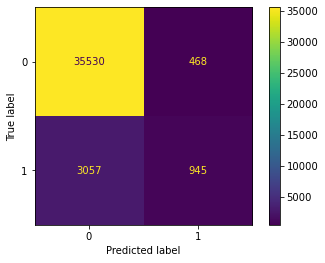

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LogReg,X_test,y_test)

Simple decision tree to predict the target variable.
And also plot the tree

In [ ]:
#split data
y = df_train['target']
X = df_train.drop(['target', "ID_code"], axis=1)
y  =  df_train.target
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [ ]:
#train and test split

from sklearn.model_selection import train_test_split
#import algorithms


from sklearn.tree import DecisionTreeClassifier


tree_model  =  DecisionTreeClassifier(max_depth=3)


tree_model.fit(X_train , y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train.shape , X_test.shape

((160000, 200), (40000, 200))

In [ ]:
#initialize model

model  = DecisionTreeClassifier(random_state= 1 , max_depth= 2)

In [ ]:
model

DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
#train model
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
y_pred_dec_tree = tree_model.predict(X_test)
y_pred_dec_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print("F1 Score :",f1_score(y_pred_dec_tree,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_dec_tree))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_dec_tree))
#plot_confusion_matrix(tree_model.predict,X_test,y_test)

F1 Score : 0.9449817693574958
Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     35930
           1       0.44      0.01      0.01      4070

    accuracy                           0.90     40000
   macro avg       0.67      0.50      0.48     40000
weighted avg       0.85      0.90      0.85     40000

Confusion Matrix: 
 [[35899    31]
 [ 4046    24]]


Prepare our data for our model¶ Random forest

Random forest classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

checking /model performance or accuracy score.

In [ ]:
y = df_train['target']
X = df_train.drop(['target', "ID_code"], axis=1)

In [ ]:
#X_test  = df_train.drop("ID_code",axis=1)

In [ ]:
#fitting the model
RF_model = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
#rfc_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [ ]:
#predicting
RF_pred = RF_model.predict(X_test)
#y_pred_rfc = rfc_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,RF_pred)

array([[35883,    47],
       [ 4007,    63]], dtype=int64)

In [ ]:
# View accuracy score
accuracy_score(y_test, RF_pred)

0.89865

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35930
           1       0.57      0.02      0.03      4070

    accuracy                           0.90     40000
   macro avg       0.74      0.51      0.49     40000
weighted avg       0.87      0.90      0.85     40000



XGboost Algorithm

SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [ ]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

In [ ]:
y = df_train['target']
X = df_train.drop(['target', "ID_code"], axis=1)

Duplicate values
Let's now check how many duplicate values exists per columns.

In [ ]:
#%%time
#features = train_df.columns.values[2:202]
#unique_max_train = []
#unique_max_test = []
#for feature in features:
    #values = train_df[feature].value_counts()
    #unique_max_train.append([feature, values.max(), values.idxmax()])
    #values = test_df[feature].value_counts()
    #unique_max_test.append([feature, values.max(), values.idxmax()])

Let's show the top 15 max of duplicate values per train set.

In [ ]:
#np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            #sort_values(by = 'Max duplicates', ascending=False).head(15))
    

Same columns in train and test set have the same or very close number of duplicates of same or very close values. This is an interesting pattern that we might be able to use in the future.

In [ ]:
#from sklearn.tree import DecisionTreeRegressor
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#regressor = DecisionTreeRegressor(random_state = 213)
#regressor.fit(X_train,y_train)

#pred = regressor.predict(X_test) 
#print(confusion_matrix(y_test, pred)) 
  
#print(classification_report(y_test, pred)) 

#fig  = plt.figure(figsize=(25, 20))
#_= tree.plot_tree(model,feature_names = ['target'], class_names = ['df_train'], label = 'all',filled = True, rounded = True)
#tree.plot_tree(model , feature_names=['target'], class_names=['df_train' ], label='all',filled= True, rounded=True )

In [ ]:
#label = df_train.target
#features = [c for c in df_train.columns if c not in ['ID_code','target']]

#X_train, X_test, y_train, y_test = train_test_split(df_train[features], label, test_size = 0.02, random_state = 7)
#X_train1, y_train1 = X_train, y_train
#X_test1, y_test1 = X_test, y_test

#model1 = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(X_train1, y_train1)
#y_pred = model1.predict(X_test1)